In [1]:
def get_iou(rect1, rect2):
    '''
    Function returns the intersection over union between 2 rectangles
    Note: rectangles need to be in corner representation 
    @param rect1,rect2: ndarray [4,]
    @return scalar value 
    '''
    ## convert all elements to float
    rect1=list(map(float, rect1))
    rect2=list(map(float, rect2))

    x_overlap=max(0, min(rect1[2], rect2[2]) - max(rect1[0], rect2[0]) )
    y_overlap=max(0, min(rect1[3], rect2[3])-  max(rect1[1], rect2[1]) )
    
    intersection_area=x_overlap*y_overlap;
    ## compute areas of individual boxes
    area1= (rect1[2]-rect1[0])*(rect1[3]-rect1[1])
    area2= (rect2[2]-rect2[0])*(rect2[3]-rect2[1])
    ##print area1, area2, intersection_area
    iou= intersection_area/float(area1+ area2- intersection_area)
    return iou 

In [3]:
GROUND_TRUTH_FILE='gt_file.txt'
PREDICTED_FILE='pred_file.txt'
TOTAL_CLASSES=20
SCORE_RANGE=10
import numpy as np

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
def compute_precision_recalls(gtfile,predfile, iou_threshold=0.5):
    """
    Function that computes precision and recalls for each individual classes
    for a particular iou_threshold by changing different score thresholds for selecting
    each output from network as valid prediction
    """
    ## define arrays for hits, classified, total
    hits= np.zeros([TOTAL_CLASSES,SCORE_RANGE])
    classified= np.zeros([TOTAL_CLASSES,SCORE_RANGE])
    ## no threshold for ground truth classes as they will always by counted 
    # during recall computation
    total= np.zeros([TOTAL_CLASSES,SCORE_RANGE])
    thresholds= np.arange(0,1, 1/float(SCORE_RANGE))
    ## now read both file line by line
    linenum=1;
    with open(gtfile) as gt, open(predfile) as pred:
        line1= gt.readline();
        line2= pred.readline();
        ## loop until there is a line to read
        while line1:
            print("Processing Line :{}".format(linenum))
            # split the lines by spaces
            elems1= line1.split()
            elems2= line2.split()
            ## now traverse over each predicted bbox and see if hits or not
            for predicted in chunks(elems2,6):
                label= predicted[5]
                score= float(predicted[4])
                # does this prediction hit?
                hit= False
                ## let us assume it crossed all the thresholds
                ## iterate over ground truth boxes to see if it hits
                total_for_instance=np.zeros(TOTAL_CLASSES)
                for truths in chunks(elems1,6):
                    ## increment the count of occurence of this particular class
                    ## since it is a float string
                    total_for_instance[int(float(truths[5]))]+=1
                    # check for class matching first
                    if label != truths[5]:
                        continue
                    # if class is matched then check for iou
                    if get_iou(predicted[0:4], truths[0:4]) >= iou_threshold:
                        hit= True
                        break;
                ## now run over thresholds to check how many it passes
                for threshold in thresholds:
                    total[int(float(label)), int(threshold*10)]+=total_for_instance[int(float(label))]
                    ## if less than discard
                    if score < threshold:
                        continue
                    else:
                        ## increment the classified count as it is being predicted 
                        classified[int(float(label)), int(threshold*10)]+=1
                        ## if it matched any ground truth than add the hit counter
                        if hit:
                            hits[int(float(label)), int(threshold*10)]+=1
            ## read next line end of processing                     
            line1= gt.readline();
            line2= pred.readline();
            linenum+=1
        ## finally compute precision and recall
        precision= hits/ classified
        recall=hits/total
        return precision, recall

precision,recall= compute_precision_recalls(GROUND_TRUTH_FILE, PREDICTED_FILE)
print("Precision Recall Computed/ Saving to Disk...")
np.savetxt("precisions.rxt", precision)
np.savetxt("recalls.txt", recall)
print("Saved to disk")

Processing Line :1
Processing Line :2
Processing Line :3
Processing Line :4
Processing Line :5
Processing Line :6
Processing Line :7
Processing Line :8
Processing Line :9
Processing Line :10
Processing Line :11
Processing Line :12
Processing Line :13
Processing Line :14
Processing Line :15
Processing Line :16
Processing Line :17
Processing Line :18
Processing Line :19
Processing Line :20
Processing Line :21
Processing Line :22
Processing Line :23
Processing Line :24
Processing Line :25
Processing Line :26
Processing Line :27
Processing Line :28
Processing Line :29
Processing Line :30
Processing Line :31
Processing Line :32
Processing Line :33
Processing Line :34
Processing Line :35
Processing Line :36
Processing Line :37
Processing Line :38
Processing Line :39
Processing Line :40
Processing Line :41
Processing Line :42
Processing Line :43
Processing Line :44
Processing Line :45
Processing Line :46
Processing Line :47
Processing Line :48
Processing Line :49
Processing Line :50
Processin

Processing Line :1472
Processing Line :1473
Processing Line :1474
Processing Line :1475
Processing Line :1476
Processing Line :1477
Processing Line :1478
Processing Line :1479
Processing Line :1480
Processing Line :1481
Processing Line :1482
Processing Line :1483
Processing Line :1484
Processing Line :1485
Processing Line :1486
Processing Line :1487
Processing Line :1488
Processing Line :1489
Processing Line :1490
Processing Line :1491
Processing Line :1492
Processing Line :1493
Processing Line :1494
Processing Line :1495
Processing Line :1496
Processing Line :1497
Processing Line :1498
Processing Line :1499
Processing Line :1500
Processing Line :1501
Processing Line :1502
Processing Line :1503
Processing Line :1504
Processing Line :1505
Processing Line :1506
Processing Line :1507
Processing Line :1508
Processing Line :1509
Processing Line :1510
Processing Line :1511
Processing Line :1512
Processing Line :1513
Processing Line :1514
Processing Line :1515
Processing Line :1516
Processing

Processing Line :2837
Processing Line :2838
Processing Line :2839
Processing Line :2840
Processing Line :2841
Processing Line :2842
Processing Line :2843
Processing Line :2844
Processing Line :2845
Processing Line :2846
Processing Line :2847
Processing Line :2848
Processing Line :2849
Processing Line :2850
Processing Line :2851
Processing Line :2852
Processing Line :2853
Processing Line :2854
Processing Line :2855
Processing Line :2856
Processing Line :2857
Processing Line :2858
Processing Line :2859
Processing Line :2860
Processing Line :2861
Processing Line :2862
Processing Line :2863
Processing Line :2864
Processing Line :2865
Processing Line :2866
Processing Line :2867
Processing Line :2868
Processing Line :2869
Processing Line :2870
Processing Line :2871
Processing Line :2872
Processing Line :2873
Processing Line :2874
Processing Line :2875
Processing Line :2876
Processing Line :2877
Processing Line :2878
Processing Line :2879
Processing Line :2880
Processing Line :2881
Processing

Processing Line :4135
Processing Line :4136
Processing Line :4137
Processing Line :4138
Processing Line :4139
Processing Line :4140
Processing Line :4141
Processing Line :4142
Processing Line :4143
Processing Line :4144
Processing Line :4145
Processing Line :4146
Processing Line :4147
Processing Line :4148
Processing Line :4149
Processing Line :4150
Processing Line :4151
Processing Line :4152
Processing Line :4153
Processing Line :4154
Processing Line :4155
Processing Line :4156
Processing Line :4157
Processing Line :4158
Processing Line :4159
Processing Line :4160
Processing Line :4161
Processing Line :4162
Processing Line :4163
Processing Line :4164
Processing Line :4165
Processing Line :4166
Processing Line :4167
Processing Line :4168
Processing Line :4169
Processing Line :4170
Processing Line :4171
Processing Line :4172
Processing Line :4173
Processing Line :4174
Processing Line :4175
Processing Line :4176
Processing Line :4177
Processing Line :4178
Processing Line :4179
Processing

Processing Line :5470
Processing Line :5471
Processing Line :5472
Processing Line :5473
Processing Line :5474
Processing Line :5475
Processing Line :5476
Processing Line :5477
Processing Line :5478
Processing Line :5479
Processing Line :5480
Processing Line :5481
Processing Line :5482
Processing Line :5483
Processing Line :5484
Processing Line :5485
Processing Line :5486
Processing Line :5487
Processing Line :5488
Processing Line :5489
Processing Line :5490
Processing Line :5491
Processing Line :5492
Processing Line :5493
Processing Line :5494
Processing Line :5495
Processing Line :5496
Processing Line :5497
Processing Line :5498
Processing Line :5499
Processing Line :5500
Processing Line :5501
Processing Line :5502
Processing Line :5503
Processing Line :5504
Processing Line :5505
Processing Line :5506
Processing Line :5507
Processing Line :5508
Processing Line :5509
Processing Line :5510
Processing Line :5511
Processing Line :5512
Processing Line :5513
Processing Line :5514
Processing

Processing Line :6970
Processing Line :6971
Processing Line :6972
Processing Line :6973
Processing Line :6974
Processing Line :6975
Processing Line :6976
Processing Line :6977
Processing Line :6978
Processing Line :6979
Processing Line :6980
Processing Line :6981
Processing Line :6982
Processing Line :6983
Processing Line :6984
Processing Line :6985
Processing Line :6986
Processing Line :6987
Processing Line :6988
Processing Line :6989
Processing Line :6990
Processing Line :6991
Processing Line :6992
Processing Line :6993
Processing Line :6994
Processing Line :6995
Processing Line :6996
Processing Line :6997
Processing Line :6998
Processing Line :6999
Processing Line :7000
Processing Line :7001
Processing Line :7002
Processing Line :7003
Processing Line :7004
Processing Line :7005
Processing Line :7006
Processing Line :7007
Processing Line :7008
Processing Line :7009
Processing Line :7010
Processing Line :7011
Processing Line :7012
Processing Line :7013
Processing Line :7014
Processing

Processing Line :8469
Processing Line :8470
Processing Line :8471
Processing Line :8472
Processing Line :8473
Processing Line :8474
Processing Line :8475
Processing Line :8476
Processing Line :8477
Processing Line :8478
Processing Line :8479
Processing Line :8480
Processing Line :8481
Processing Line :8482
Processing Line :8483
Processing Line :8484
Processing Line :8485
Processing Line :8486
Processing Line :8487
Processing Line :8488
Processing Line :8489
Processing Line :8490
Processing Line :8491
Processing Line :8492
Processing Line :8493
Processing Line :8494
Processing Line :8495
Processing Line :8496
Processing Line :8497
Processing Line :8498
Processing Line :8499
Processing Line :8500
Processing Line :8501
Processing Line :8502
Processing Line :8503
Processing Line :8504
Processing Line :8505
Processing Line :8506
Processing Line :8507
Processing Line :8508
Processing Line :8509
Processing Line :8510
Processing Line :8511
Processing Line :8512
Processing Line :8513
Processing

Processing Line :9969
Processing Line :9970
Processing Line :9971
Processing Line :9972
Processing Line :9973
Processing Line :9974
Processing Line :9975
Processing Line :9976
Processing Line :9977
Processing Line :9978
Processing Line :9979
Processing Line :9980
Processing Line :9981
Processing Line :9982
Processing Line :9983
Processing Line :9984
Processing Line :9985
Processing Line :9986
Processing Line :9987
Processing Line :9988
Processing Line :9989
Processing Line :9990
Processing Line :9991
Processing Line :9992
Processing Line :9993
Processing Line :9994
Processing Line :9995
Processing Line :9996
Processing Line :9997
Processing Line :9998
Processing Line :9999
Processing Line :10000
Processing Line :10001
Processing Line :10002
Processing Line :10003
Processing Line :10004
Processing Line :10005
Processing Line :10006
Processing Line :10007
Processing Line :10008
Processing Line :10009
Processing Line :10010
Processing Line :10011
Processing Line :10012
Processing Line :10

Processing Line :11474
Processing Line :11475
Processing Line :11476
Processing Line :11477
Processing Line :11478
Processing Line :11479
Processing Line :11480
Processing Line :11481
Processing Line :11482
Processing Line :11483
Processing Line :11484
Processing Line :11485
Processing Line :11486
Processing Line :11487
Processing Line :11488
Processing Line :11489
Processing Line :11490
Processing Line :11491
Processing Line :11492
Processing Line :11493
Processing Line :11494
Processing Line :11495
Processing Line :11496
Processing Line :11497
Processing Line :11498
Processing Line :11499
Processing Line :11500
Processing Line :11501
Processing Line :11502
Processing Line :11503
Processing Line :11504
Processing Line :11505
Processing Line :11506
Processing Line :11507
Processing Line :11508
Processing Line :11509
Processing Line :11510
Processing Line :11511
Processing Line :11512
Processing Line :11513
Processing Line :11514
Processing Line :11515
Processing Line :11516
Processing 

Processing Line :12812
Processing Line :12813
Processing Line :12814
Processing Line :12815
Processing Line :12816
Processing Line :12817
Processing Line :12818
Processing Line :12819
Processing Line :12820
Processing Line :12821
Processing Line :12822
Processing Line :12823
Processing Line :12824
Processing Line :12825
Processing Line :12826
Processing Line :12827
Processing Line :12828
Processing Line :12829
Processing Line :12830
Processing Line :12831
Processing Line :12832
Processing Line :12833
Processing Line :12834
Processing Line :12835
Processing Line :12836
Processing Line :12837
Processing Line :12838
Processing Line :12839
Processing Line :12840
Processing Line :12841
Processing Line :12842
Processing Line :12843
Processing Line :12844
Processing Line :12845
Processing Line :12846
Processing Line :12847
Processing Line :12848
Processing Line :12849
Processing Line :12850
Processing Line :12851
Processing Line :12852
Processing Line :12853
Processing Line :12854
Processing 

Processing Line :14467
Processing Line :14468
Processing Line :14469
Processing Line :14470
Processing Line :14471
Processing Line :14472
Processing Line :14473
Processing Line :14474
Processing Line :14475
Processing Line :14476
Processing Line :14477
Processing Line :14478
Processing Line :14479
Processing Line :14480
Processing Line :14481
Processing Line :14482
Processing Line :14483
Processing Line :14484
Processing Line :14485
Processing Line :14486
Processing Line :14487
Processing Line :14488
Processing Line :14489
Processing Line :14490
Processing Line :14491
Processing Line :14492
Processing Line :14493
Processing Line :14494
Processing Line :14495
Processing Line :14496
Processing Line :14497
Processing Line :14498
Processing Line :14499
Processing Line :14500
Processing Line :14501
Processing Line :14502
Processing Line :14503
Processing Line :14504
Processing Line :14505
Processing Line :14506
Processing Line :14507
Processing Line :14508
Processing Line :14509
Processing 

Processing Line :16467
Processing Line :16468
Processing Line :16469
Processing Line :16470
Processing Line :16471
Processing Line :16472
Processing Line :16473
Processing Line :16474
Processing Line :16475
Processing Line :16476
Processing Line :16477
Processing Line :16478
Processing Line :16479
Processing Line :16480
Processing Line :16481
Processing Line :16482
Processing Line :16483
Processing Line :16484
Processing Line :16485
Processing Line :16486
Processing Line :16487
Processing Line :16488
Processing Line :16489
Processing Line :16490
Processing Line :16491
Processing Line :16492
Processing Line :16493
Processing Line :16494
Processing Line :16495
Processing Line :16496
Processing Line :16497
Processing Line :16498
Processing Line :16499
Processing Line :16500
Processing Line :16501
Processing Line :16502
Processing Line :16503
Processing Line :16504
Processing Line :16505
Processing Line :16506
Processing Line :16507
Processing Line :16508
Processing Line :16509
Processing 

In [7]:
import numpy as np
perClassMap=np.mean(precision, axis=1)
overallMap=np.mean(perClassMap)

np.set_printoptions(precision=2)
print(perClassMap)
print(overallMap)

[0.88 0.83 0.88 0.81 0.66 0.53 0.89 0.62 0.97 0.81 0.73 0.95 0.94 0.9
 0.91 0.82 0.66 0.69 0.97 0.93]
0.8196865352602722


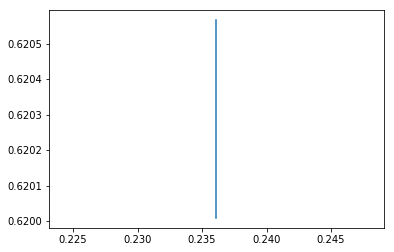

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(recall[7,:], precision[7,:])
plt.show()